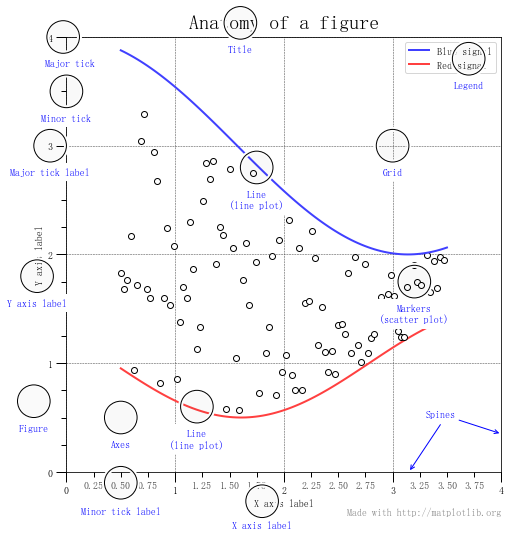

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')


# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xycoords='data',
            xytext=(3.3, 0.5), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.annotate('', xy=(3.15, 0.0), xycoords='data',
            xytext=(3.45, 0.45), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.text(4.0, -0.4, "Made with http://matplotlib.org",
        fontsize=10, ha="right", color='.5')

plt.show()

In [4]:
import matplotlib
#解决字体乱码问题
# 1.查看matplotlib配置文件位置
# 本例为'/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc'
matplotlib.matplotlib_fname()

# 2.将字体拷贝到上述配置文件所在目录下的字体目录里
# /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf

# 3.修改上述配置文件
# font.family         : sans-serif
# font.sans-serif     : Simsun, DejaVu Sans, Bitstream Vera Sans。。。。。
# axes.unicode_minus  : False    # use unicode for the minus symbol

# 4.重启or刷新缓存（~/.cache/matplotlib）

'/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc'

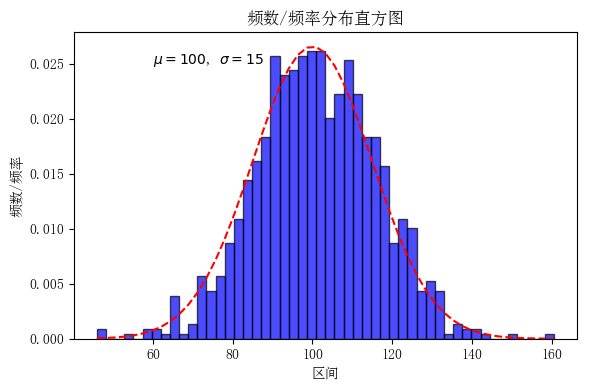

In [5]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import matplotlib
from scipy.stats import norm

# 设置matplotlib正常显示中文和负号（前提是把字体库导入）
matplotlib.rcParams['font.sans-serif']=['SimSun']   # 用宋体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 用来正常显示负号
#plt.rcParams['figure.figsize'] = (10.0, 8.0) # 设置图像大小
plt.rcParams['image.interpolation'] = 'nearest' # 设置 interpolation style
plt.rcParams['image.cmap'] = 'gray'  
plt.rcParams['savefig.dpi'] = 300 #图片像素
plt.rcParams['figure.dpi'] = 100 #分辨率
# 默认的像素：[6.0,4.0]，分辨率为100，图片尺寸为 600&400
# 指定dpi=200，图片尺寸为 1200*800
# 指定dpi=300，图片尺寸为 1800*1200
# 设置figsize可以在不改变分辨率情况下改变比例

# 随机生成服从正态分布的数据
mu = 100  # 均值
sigma = 15  # 标准差
data = mu + sigma * np.random.randn(1000)
# 长条形数目
num_bins = 50
"""
绘制直方图
data:必选参数，绘图数据
bins:直方图的长条形数目，可选项，默认为10
normed:是否将得到的直方图向量归一化，可选项，默认为0，代表不归一化，显示频数。normed=1，表示归一化，显示频率。
facecolor:长条形的颜色
edgecolor:长条形边框的颜色
alpha:透明度
"""
#plt.hist(data, num_bins, normed=0, facecolor="blue", edgecolor="black", alpha=0.7)
n, bins, patches = plt.hist(data, num_bins, density=1, facecolor="blue", edgecolor="black", alpha=0.7)
# 添加拟合曲线  
#y = mlab.normpdf(bins, mu, sigma)
y = norm.pdf(bins, mu, sigma)
plt.plot(bins, y, 'r--') 
# 显示横轴标签
plt.xlabel("区间")
# 显示纵轴标签
plt.ylabel("频数/频率")
# 显示图标题
plt.title("频数/频率分布直方图")
plt.text(60,0.025,'$\mu=100$, $\sigma=15$')
# 自动调整图像外部边缘以填充轴域（实验性质）
plt.tight_layout()
plt.show()

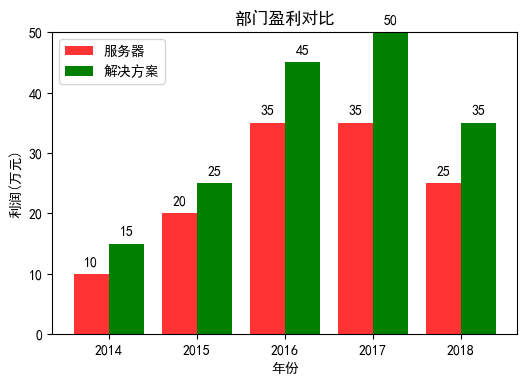

In [6]:
import matplotlib.pyplot as plt
import matplotlib
# 设置中文字体和负号正常显示
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

label_list = ['2014', '2015', '2016', '2017', '2018']    # 横坐标刻度显示值
num_list1 = [10, 20, 35, 35, 25]      # 纵坐标值1
num_list2 = [15, 25, 45, 50, 35]      # 纵坐标值2
x = range(len(num_list1))
"""
绘制条形图
left:长条形中点横坐标
height:长条形高度
width:长条形宽度，默认值0.8
label:为后面设置legend准备
"""
mywidth = 0.4
rects1 = plt.bar(x=x, height=num_list1, width=mywidth, alpha=0.8, color='red', label="服务器")
rects2 = plt.bar(x=[i + mywidth for i in x], height=num_list2, width=mywidth, color='green', label="解决方案")
plt.ylim(0, 50)     # y轴取值范围
plt.ylabel("利润(万元)")
"""
设置x轴刻度显示值
参数一：中点坐标
参数二：显示值
"""
plt.xticks([index + 0.2 for index in x], label_list)
plt.xlabel("年份")
plt.title("部门盈利对比")
plt.legend()     # 设置题注
# 每个柱状图上方显示相应文本
for rect in rects1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height+1, str(height), ha="center", va="bottom")
for rect in rects2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height+1, str(height), ha="center", va="bottom")
plt.show()

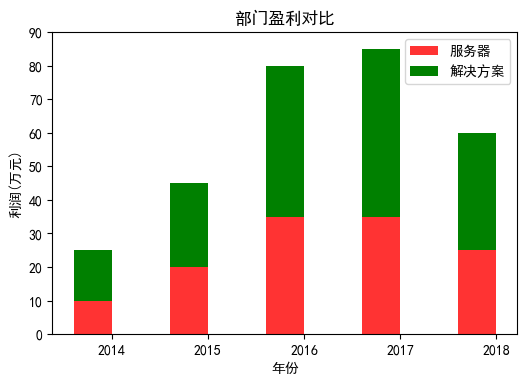

In [10]:
import matplotlib.pyplot as plt
import matplotlib
# 设置中文字体和负号正常显示
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

label_list = ['2014', '2015', '2016', '2017', '2018']    # 横坐标刻度显示值
num_list1 = [10, 20, 35, 35, 25]      # 纵坐标值1
num_list2 = [15, 25, 45, 50, 35]      # 纵坐标值2
x = range(len(num_list1))
"""
绘制条形图
left:长条形中点横坐标
height:长条形高度
width:长条形宽度，默认值0.8
label:为后面设置legend准备
"""
mywidth = 0.4
rects1 = plt.bar(x=x, height=num_list1, width=mywidth, alpha=0.8, color='red', label="服务器")
rects2 = plt.bar(x=x, height=num_list2, width=mywidth, color='green', label="解决方案", bottom=num_list1)
plt.ylim(0, 90)     # y轴取值范围
plt.ylabel("利润(万元)")
"""
设置x轴刻度显示值
参数一：中点坐标
参数二：显示值
"""
plt.xticks([index + 0.2 for index in x], label_list)
plt.xlabel("年份")
plt.title("部门盈利对比")
plt.legend()     # 设置题注
plt.show()

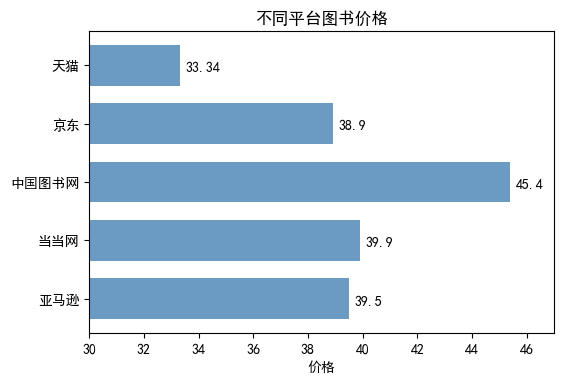

In [11]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

price = [39.5, 39.9, 45.4, 38.9, 33.34]
"""
绘制水平条形图方法barh
参数一：y轴
参数二：x轴
"""
plt.barh(range(5), price, height=0.7, color='steelblue', alpha=0.8)      # 从下往上画
plt.yticks(range(5), ['亚马逊', '当当网', '中国图书网', '京东', '天猫'])
plt.xlim(30,47)
plt.xlabel("价格")
plt.title("不同平台图书价格")
for x, y in enumerate(price):
    plt.text(y + 0.2, x - 0.1, '%s' % y)
plt.show()

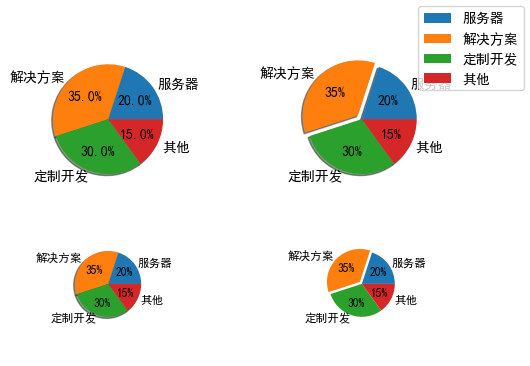

In [26]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

labels = ["服务器", "解决方案", "定制开发", "其他"]    # 各部分标签
nums = [20, 35, 30, 15]    # 各部分数值
colors = ["red", "green", "blue", "orange"]     # 各部分颜色
"""
绘制饼图
explode：设置各部分突出
label:设置各部分标签
labeldistance:设置标签文本距圆心位置，1.1表示1.1倍半径
autopct：设置圆里面文本
shadow：设置是否有阴影
startangle：起始角度，默认从0开始逆时针转
pctdistance：设置圆内文本距圆心距离
返回值
l_text：圆内部文本，matplotlib.text.Text object
p_text：圆外部文本
#patches, l_text, p_text = plt.pie(size, explode=explode, colors=color, labels=label_list, labeldistance=1.1, autopct="%1.1f%%", shadow=False, startangle=90, pctdistance=0.6)
plt.axis("equal")    # 设置横轴和纵轴大小相等，这样饼才是圆的
"""
# 创建2行2列的图像区域
fig, axs = plt.subplots(2, 2)

# 基本图形
#axs[0, 0].pie(nums, labels=labels, colors =colors, autopct='%1.1f%%', shadow=True)
axs[0, 0].pie(nums, labels=labels, autopct='%1.1f%%', shadow=True)
# 突出某一部分
axs[0, 1].pie(nums, labels=labels, autopct='%.0f%%', shadow=True,
              explode=(0, 0.1, 0, 0))

# 调整半径以绘制小图
patches, texts, autotexts = axs[1, 0].pie(nums, labels=labels,
                                          autopct='%.0f%%',
                                          textprops={'size': 'smaller'},
                                          shadow=True, radius=0.6)
# 小文字
#plt.setp(autotexts, size='x-small')
#autotexts[0].set_color('white')

# 突出某一部分
patches, texts, autotexts = axs[1, 1].pie(nums, labels=labels,
                                          autopct='%.0f%%',
                                          textprops={'size': 'smaller'},
                                          shadow=False, radius=0.6,
                                          explode=(0, 0.05, 0, 0))
#plt.setp(autotexts, size='x-small')
#autotexts[0].set_color('white')
#plt.legend()
fig.legend(labels=labels,loc='upper right')
plt.show()

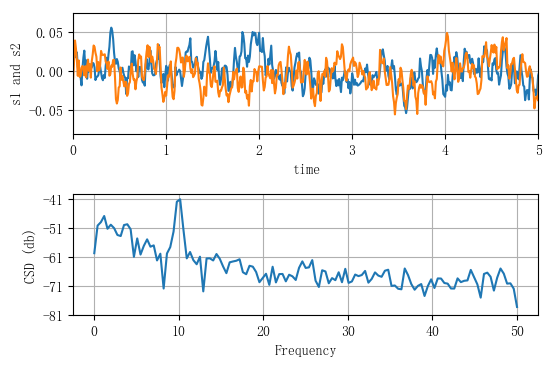

In [6]:
import numpy as np
import matplotlib.pyplot as plt


fig, (ax1, ax2) = plt.subplots(2, 1)
# make a little extra space between the subplots
fig.subplots_adjust(hspace=0.5)

dt = 0.01
t = np.arange(0, 30, dt)

# Fixing random state for reproducibility
np.random.seed(19680801)


nse1 = np.random.randn(len(t))                 # white noise 1
nse2 = np.random.randn(len(t))                 # white noise 2
r = np.exp(-t / 0.05)

cnse1 = np.convolve(nse1, r, mode='same') * dt   # colored noise 1
cnse2 = np.convolve(nse2, r, mode='same') * dt   # colored noise 2

# two signals with a coherent part and a random part
s1 = 0.01 * np.sin(2 * np.pi * 10 * t) + cnse1
s2 = 0.01 * np.sin(2 * np.pi * 10 * t) + cnse2

ax1.plot(t, s1, t, s2)
ax1.set_xlim(0, 5)
ax1.set_xlabel('time')
ax1.set_ylabel('s1 and s2')
ax1.grid(True)

cxy, f = ax2.csd(s1, s2, 256, 1. / dt)
ax2.set_ylabel('CSD (db)')
plt.show()

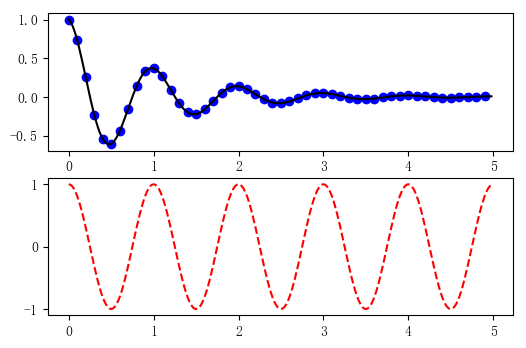

In [7]:
import numpy as np
import matplotlib.pyplot as plt
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)
t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1)
#subplot(nrows, ncols, plot_number)
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0.5, 1.0, 'Figure1:Easy as 1, 2, 3')

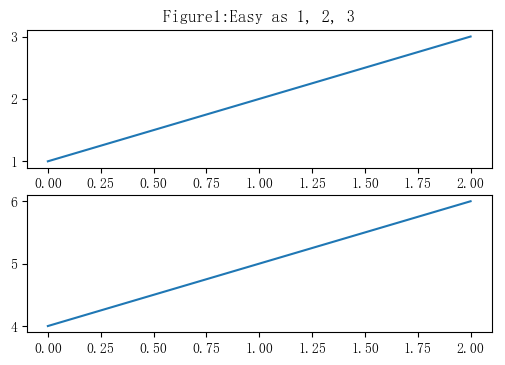

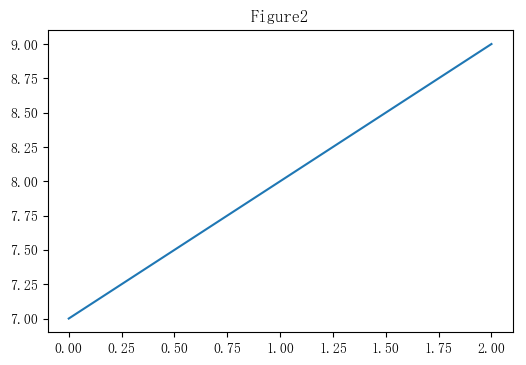

In [9]:
import matplotlib.pyplot as plt
plt.figure(1) # 第一个图形
plt.subplot(211) # 第一个图形的第一个子图
plt.plot([1, 2, 3])
plt.subplot(212) # 第一个图形的第二个子图
plt.plot([4, 5, 6])
plt.figure(2) # 第二个图形
plt.plot([7, 8, 9]) # 默认创建 subplot(111)
plt.title('Figure2') #标题
plt.figure(1) # 当前是图形 1，subplot(212)
plt.subplot(211) # 将第一个图形的 subplot(211) 设为当前子图
plt.title('Figure1:Easy as 1, 2, 3') # 子图 211 的标题

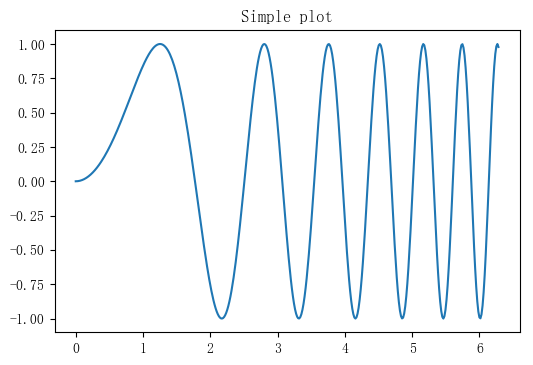

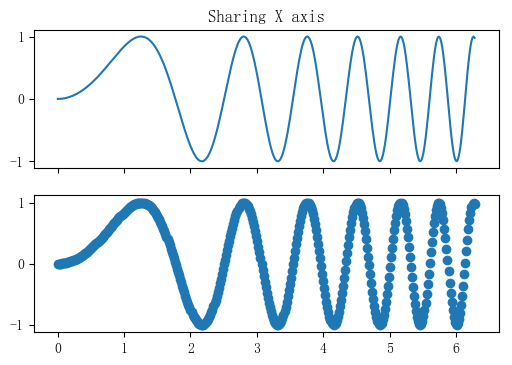

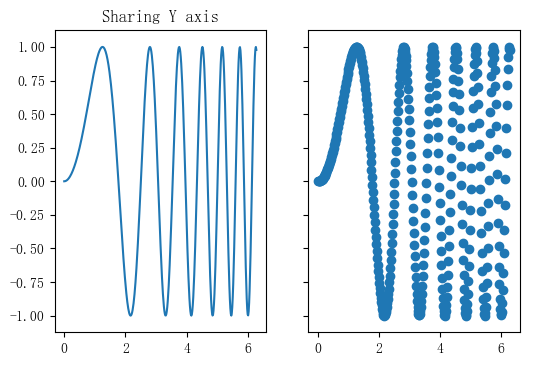

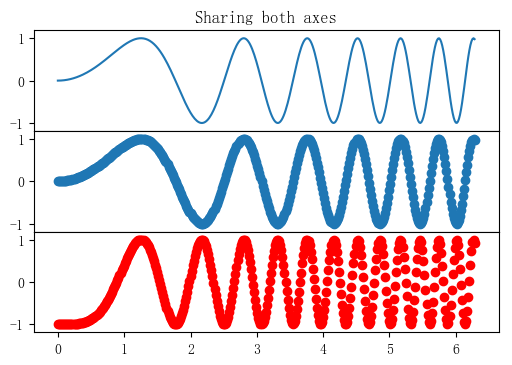

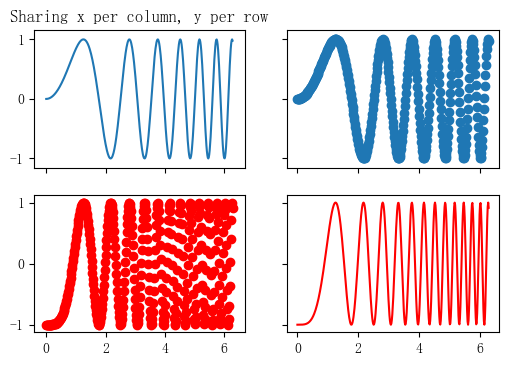

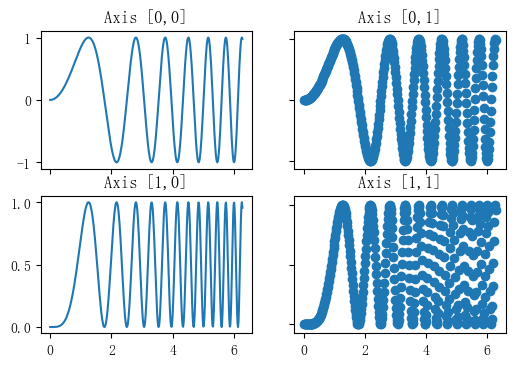

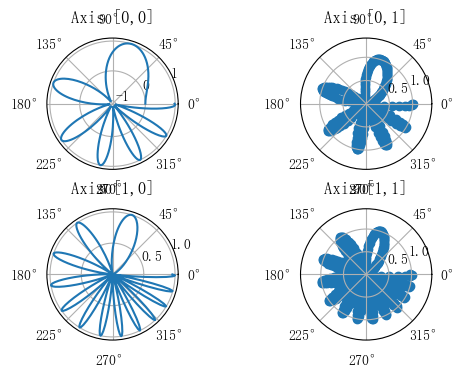

In [10]:
#子图示例
%run subplots_demo.py

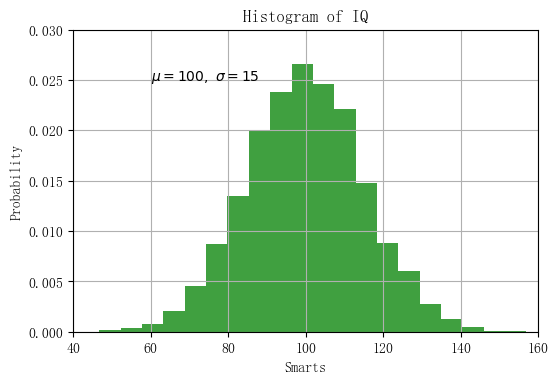

In [11]:
import numpy as np
import matplotlib.pyplot as plt
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)
# 数据的直方图
n, bins, patches = plt.hist(x, 20, density=1, facecolor='g', alpha=0.75)
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

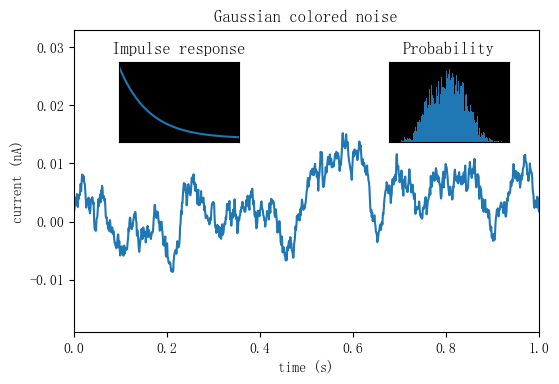

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


# create some data to use for the plot
dt = 0.001
t = np.arange(0.0, 10.0, dt)
r = np.exp(-t[:1000] / 0.05)  # impulse response
x = np.random.randn(len(t))
s = np.convolve(x, r)[:len(x)] * dt  # colored noise

# the main axes is subplot(111) by default
plt.plot(t, s)
plt.axis([0, 1, 1.1 * np.min(s), 2 * np.max(s)])
plt.xlabel('time (s)')
plt.ylabel('current (nA)')
plt.title('Gaussian colored noise')

# this is an inset axes over the main axes
a = plt.axes([.65, .6, .2, .2], facecolor='k')
n, bins, patches = plt.hist(s, 400, density=True)
plt.title('Probability')
plt.xticks([])
plt.yticks([])

# this is another inset axes over the main axes
a = plt.axes([0.2, 0.6, .2, .2], facecolor='k')
plt.plot(t[:len(r)], r)
plt.title('Impulse response')
plt.xlim(0, 0.2)
plt.xticks([])
plt.yticks([])

plt.show()

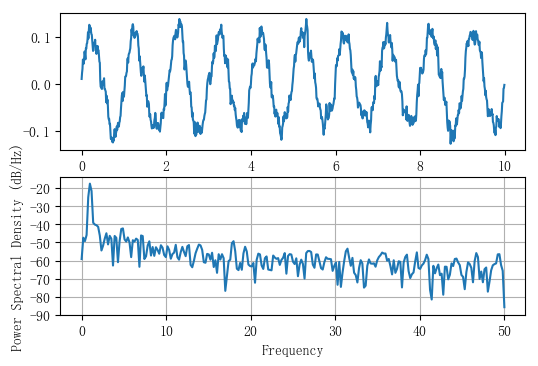

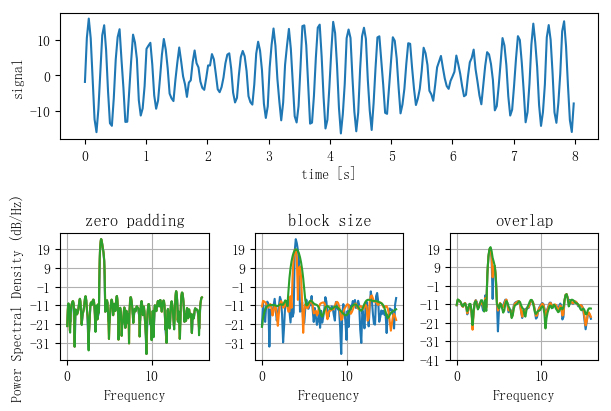

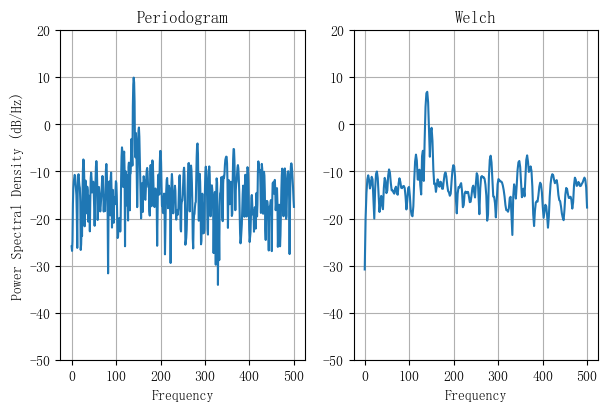

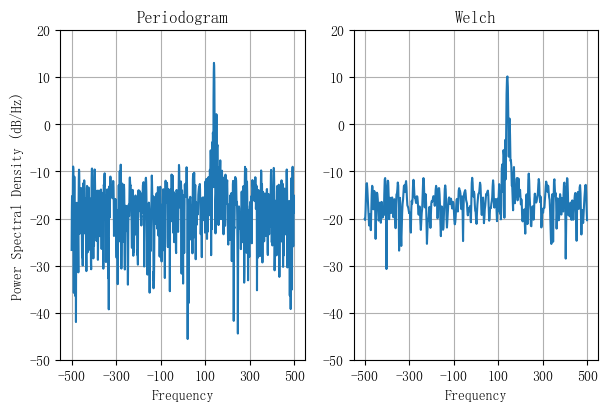

In [13]:
%run psd_demo.py

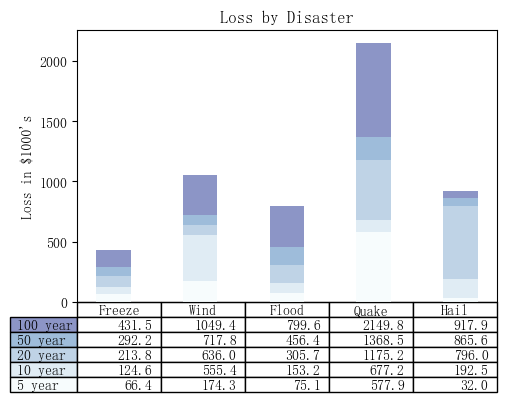

In [14]:
import numpy as np
import matplotlib.pyplot as plt


data = [[ 66386, 174296,  75131, 577908,  32015],
        [ 58230, 381139,  78045,  99308, 160454],
        [ 89135,  80552, 152558, 497981, 603535],
        [ 78415,  81858, 150656, 193263,  69638],
        [139361, 331509, 343164, 781380,  52269]]

columns = ('Freeze', 'Wind', 'Flood', 'Quake', 'Hail')
rows = ['%d year' % x for x in (100, 50, 20, 10, 5)]

values = np.arange(0, 2500, 500)
value_increment = 1000

# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows)))
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel("Loss in ${0}'s".format(value_increment))
plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
plt.title('Loss by Disaster')

plt.show()

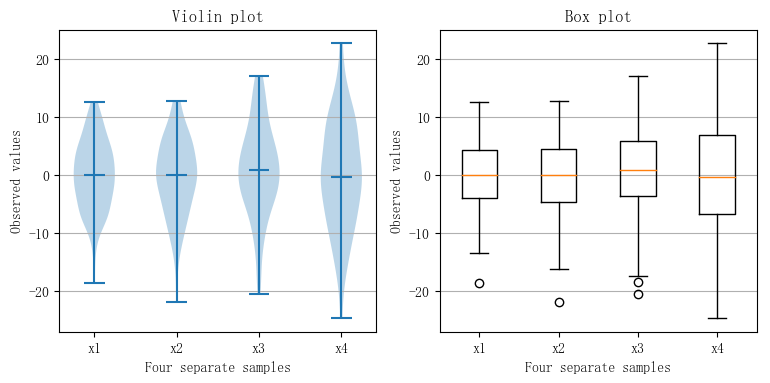

In [15]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# Fixing random state for reproducibility
np.random.seed(19680801)


# generate some random test data
all_data = [np.random.normal(0, std, 100) for std in range(6, 10)]

# plot violin plot
axes[0].violinplot(all_data,
                   showmeans=False,
                   showmedians=True)
axes[0].set_title('Violin plot')

# plot box plot
axes[1].boxplot(all_data)
axes[1].set_title('Box plot')

# adding horizontal grid lines
for ax in axes:
    ax.yaxis.grid(True)
    ax.set_xticks([y + 1 for y in range(len(all_data))])
    ax.set_xlabel('Four separate samples')
    ax.set_ylabel('Observed values')

# add x-tick labels
plt.setp(axes, xticks=[y + 1 for y in range(len(all_data))],
         xticklabels=['x1', 'x2', 'x3', 'x4'])
plt.show()